In [24]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
# Loading dataset
df = pd.read_csv("D:\Techno Data\Data\companies\companies.csv")
df.head(5)

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [7]:
# Removing unwanted columns
df1 = df.iloc[:,5:]
df1.head(5)

,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [11]:
# information about dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 196531 non-null  object 
 1   normalized_name      196527 non-null  object 
 2   permalink            196553 non-null  object 
 3   category_code        123186 non-null  object 
 4   status               196553 non-null  object 
 5   founded_at           91227 non-null   object 
 6   closed_at            2620 non-null    object 
 7   domain               126545 non-null  object 
 8   homepage_url         126545 non-null  object 
 9   twitter_username     80591 non-null   object 
 10  logo_url             110110 non-null  object 
 11  logo_width           110110 non-null  float64
 12  logo_height          110110 non-null  float64
 13  short_description    7131 non-null    object 
 14  description          92048 non-null   object 
 15  overview         

,Column Name,Null Percentage %
0,name,0.01
1,normalized_name,0.01
2,category_code,37.33
3,founded_at,53.59
4,closed_at,98.67
5,domain,35.62
6,homepage_url,35.62
7,twitter_username,59.00
8,logo_url,43.98
9,logo_width,43.98


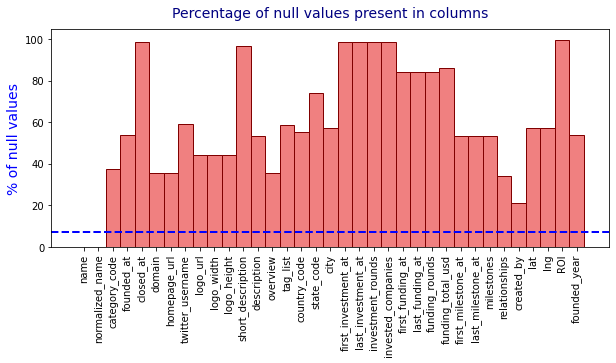

In [562]:
# create a function to find percentage of null values
def null_values(dataframe):
    null_columns =[]      # empty list to store data
    values =[]
    
    for i in dataframe:
        if dataframe[i].isna().sum()>0:
            #print(i," - {} %.".format(round((dataframe[i].isnull().sum()/dataframe.shape[0])*100,2)))
            null_columns.append(i)
            values.append(round((dataframe[i].isnull().sum()/dataframe.shape[0])*100,2))
            
    
    data = [null_columns,values]
    df_null = pd.DataFrame({'Column Name':null_columns, 'Null Percentage %':values})
    
    
    # for graphical view of null values 
    plt.figure(figsize=(10,4))
    plt.bar(x=null_columns,height=values,width=1,edgecolor="maroon",color="lightcoral")
    plt.xticks(rotation=90)
    plt.title("Percentage of null values present in columns",color="navy",fontsize=14,pad=12)
    plt.ylabel("% of null values",color='b',fontsize=14)
    plt.axhline(y=7,linewidth=2,linestyle='dashed', color='blue')
    return df_null

null_values(df1)

* Most of the columns containing very high null values.

In [12]:
# Summary statistics
df1.describe()

,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


* There is huge difference in Mean and Median values which suggest that there is skewness present in dataset.
* Huge difference between 75th percentile and 100th percentile shows that outliers present in dataset.
* Some of the columns containing high standard error.

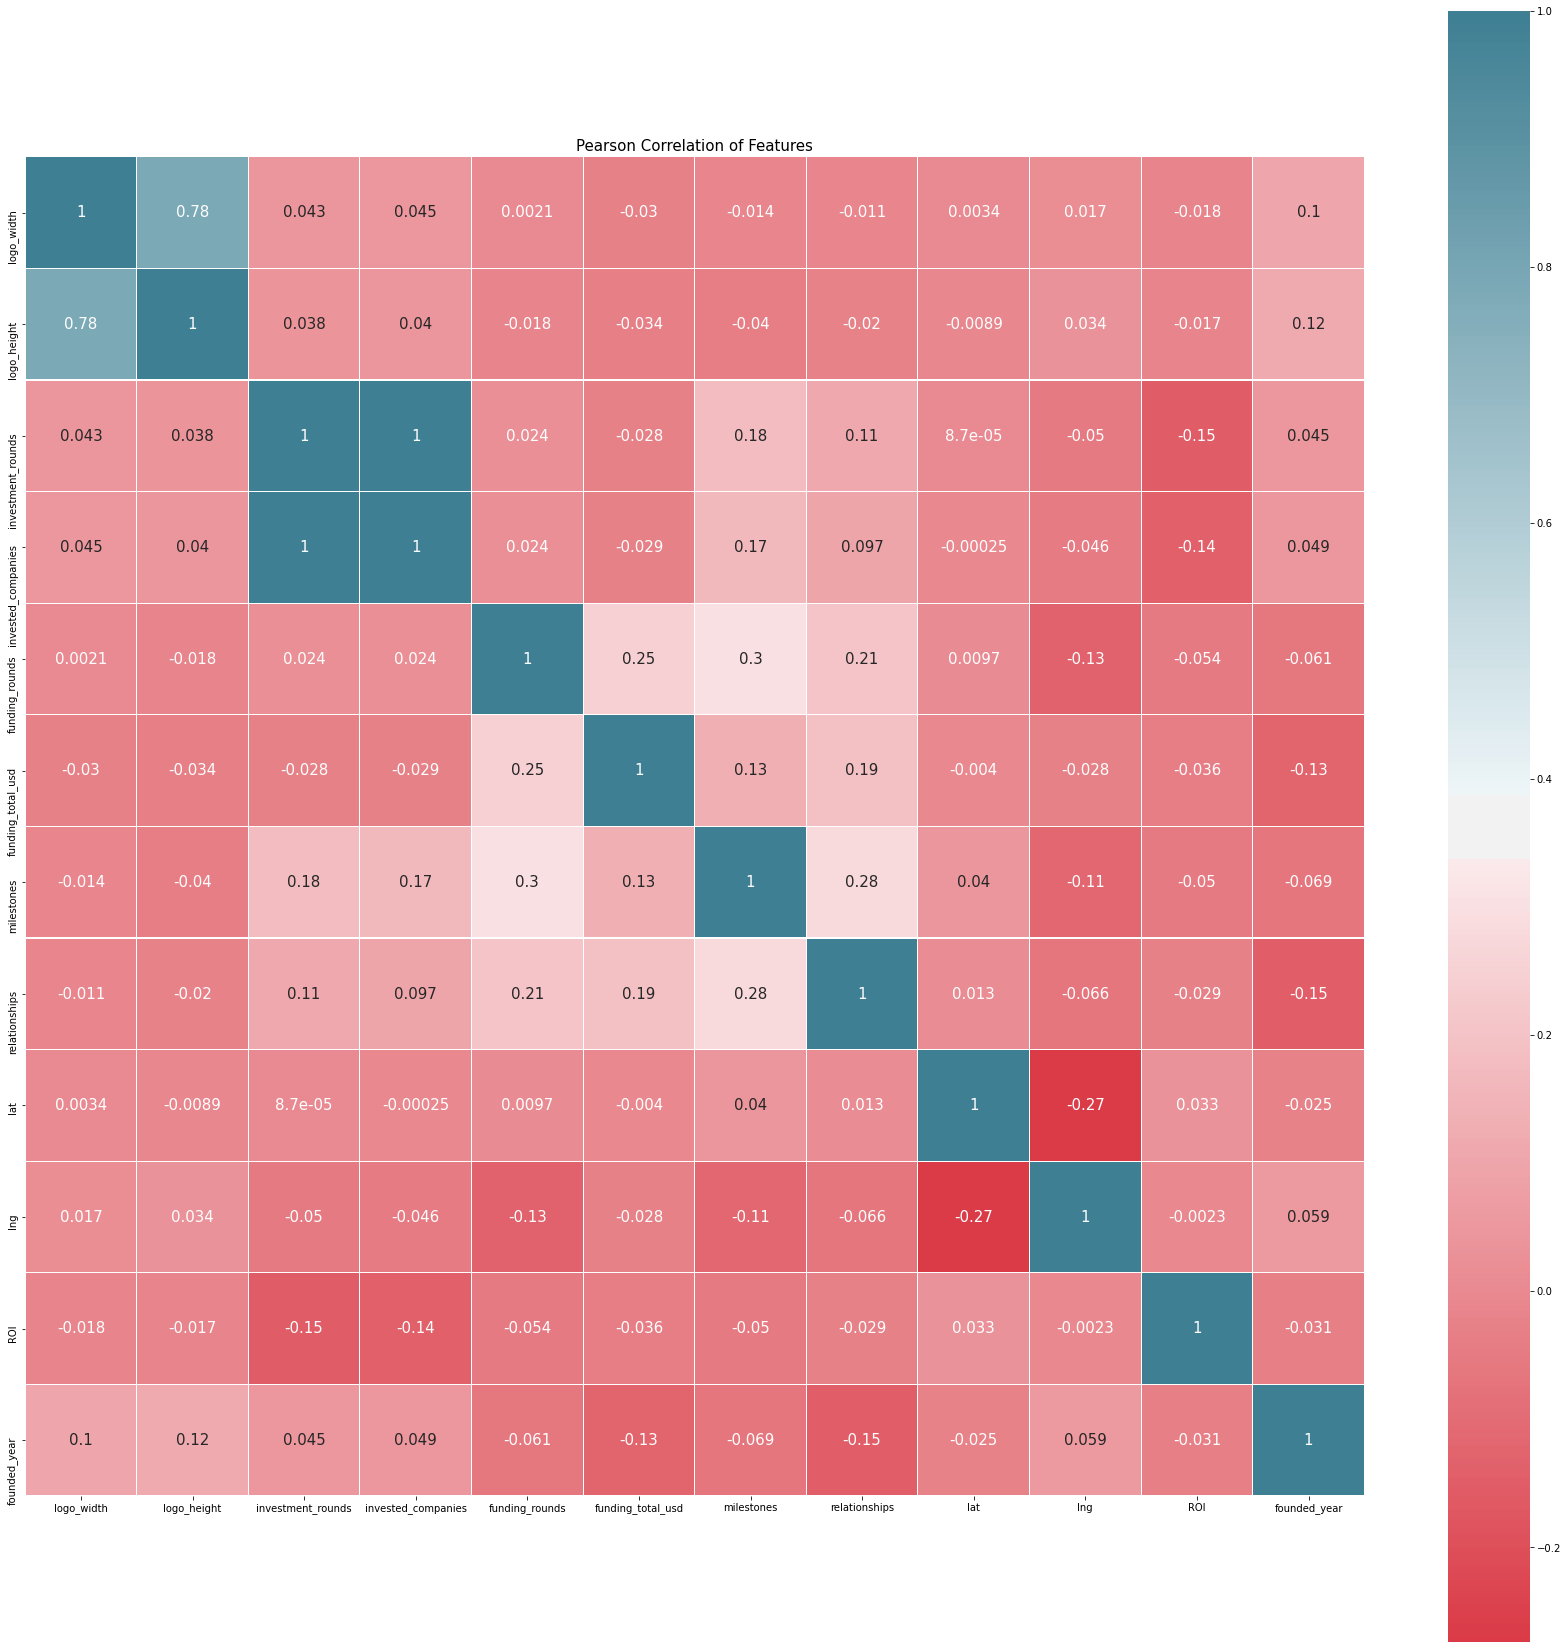

In [426]:
# checking correlation
plt.figure(figsize=(30,30))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(df1.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':15 })
plt.show()

# Data Cleaning

In [314]:
# Checking unique values

categorical_cols , numerical_cols = [],[]
for i in df1.columns:
    if df1[i].dtype == 'O':
        categorical_cols.append(i)
    else:
        numerical_cols.append(i)

In [334]:
for i in categorical_cols:
    if len(df1[i].unique()) < 200:
        print("{} unique values --> {}".format(i, df1[i].unique()))
        print("\n")
        
    else:
        pass

category_code unique values --> ['web' 'games_video' 'network_hosting' 'advertising' 'cleantech' nan
 'enterprise' 'other' 'consulting' 'mobile' 'health' 'software'
 'analytics' 'finance' 'education' 'medical' 'manufacturing' 'biotech'
 'ecommerce' 'public_relations' 'hardware' 'search' 'news' 'government'
 'security' 'photo_video' 'travel' 'semiconductor' 'social' 'legal'
 'transportation' 'hospitality' 'sports' 'nonprofit' 'fashion' 'messaging'
 'music' 'automotive' 'design' 'real_estate' 'local' 'nanotech' 'pets']


status unique values --> ['operating' 'acquired' 'closed' 'ipo']


country_code unique values --> ['USA' nan 'MAR' 'IND' 'AUS' 'FRA' 'JPN' 'NLD' 'EGY' 'ISR' 'GBR' 'THA'
 'CAN' 'AUT' 'IRL' 'SWE' 'DEU' 'BRA' 'FIN' 'RUS' 'SGP' 'MEX' 'CHN' 'ESP'
 'ISL' 'KOR' 'TUR' 'DNK' 'ARG' 'PAK' 'HUN' 'POL' 'GRC' 'PRT' 'BLR' 'CSS'
 'MKD' 'CHE' 'SVN' 'UKR' 'ITA' 'NZL' 'LIE' 'NOR' 'CZE' 'VNM' 'HRV' 'BEN'
 'CHL' 'GHA' 'ZAF' 'MYS' 'EST' 'BEL' 'SVK' 'TWN' 'CRI' 'HKG' 'BGD' 'BOL'
 'LBN' 'LUX' '

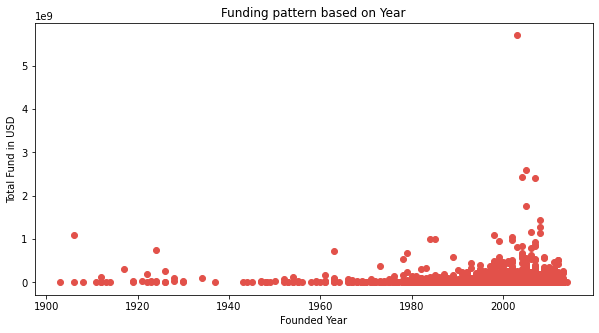

In [559]:
# converting into datetime
df1['founded_at'] = pd.to_datetime(df1['founded_at'])
df1['founded_year'] = pd.DatetimeIndex(df1['founded_at']).year
plt.figure(figsize=(10,5))
plt.scatter(x='founded_year',y='funding_total_usd',data=df1)
plt.xlabel('Founded Year')
plt.ylabel('Total Fund in USD')
plt.title("Funding pattern based on Year")
plt.show()

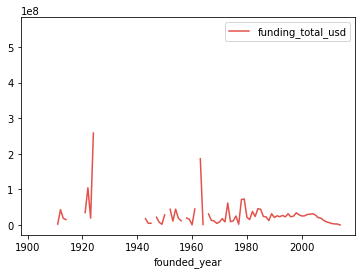

In [560]:
df1[['founded_year','funding_total_usd']].groupby(['founded_year']).mean().plot()

## EDA

In [556]:
# Bivariate Analysis
def dataframes(column):
    status_type,percentage = [],[]
    for i,j in zip(df1[column].value_counts().index,df1[column].value_counts().values):
        status_type.append(i.capitalize())
        percentage.append((round(j/len(df1[column]),4)*100))
        
    df = pd.DataFrame({})
    df['Type'] = status_type
    df['Percentage'] = percentage
    
    plt.figure(figsize=(10,4))
    sns.set_palette("Spectral")
    sns.barplot(x=df.Type,y=df.Percentage,data= df)
    plt.xticks(rotation = 90)
    plt.show()
    return df


### Contribution of Categories

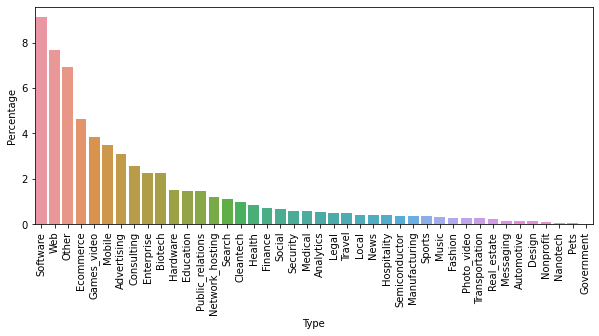

,Type,Percentage
0,Software,9.12
1,Web,7.69
2,Other,6.93
3,Ecommerce,4.61
4,Games_video,3.83
5,Mobile,3.49
6,Advertising,3.10
7,Consulting,2.55
8,Enterprise,2.26
9,Biotech,2.25


In [557]:
dataframes('category_code')


### Contribution by Status

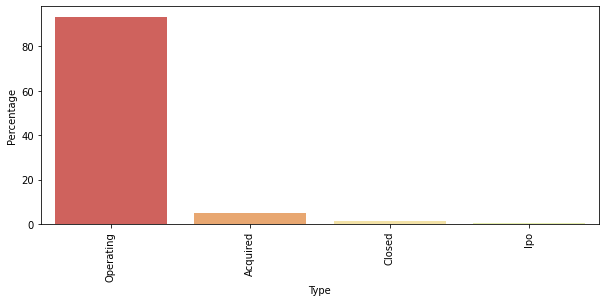

,Type,Percentage
0,Operating,93.33
1,Acquired,4.78
2,Closed,1.31
3,Ipo,0.58


In [558]:
dataframes('status')

#### Top 10 Companies by Highest Funding

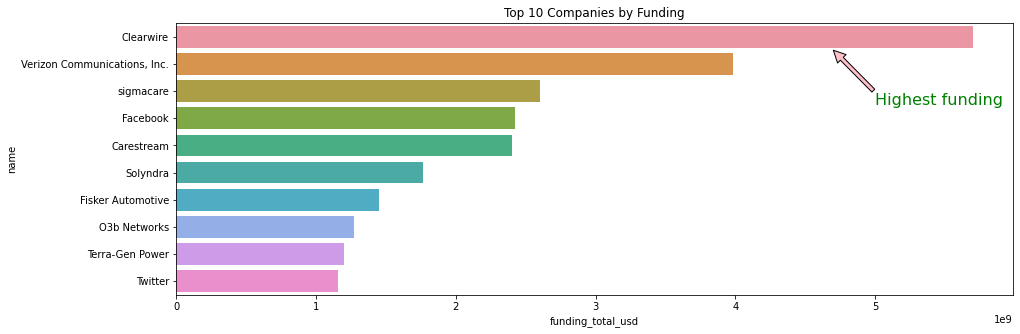

In [549]:
# Finding top funding 
top_fund_companies = df1[['name','funding_total_usd']].nlargest(n=10, columns=['funding_total_usd'])
plt.figure(figsize=(15, 5))

sns.set_palette("copper")
sns.barplot(x='funding_total_usd',y='name',data=top_fund_companies )
plt.annotate('Highest funding', xy = (4.7e9, 0.5), 
             fontsize = 16, xytext = (5e9, 2.5), 
             arrowprops = dict(facecolor = 'pink'),
             color = 'g')
    
plt.title("Top 10 Companies by Funding")
plt.show()

### Funding based on Status

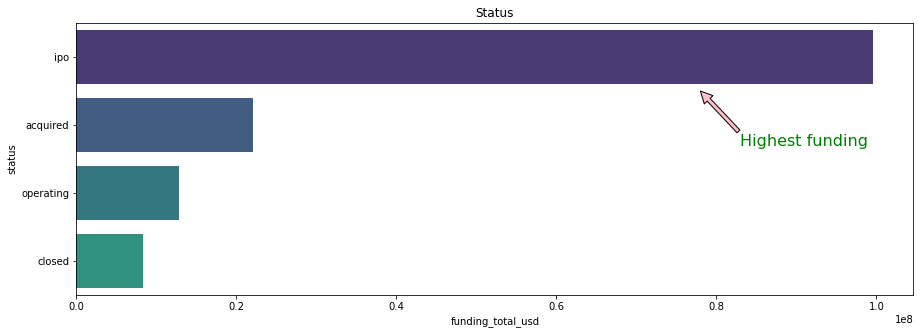

In [543]:
# Based on Status
top_status_fund = df1[['status','funding_total_usd']].groupby(by=['status']).mean().sort_values(by = 'funding_total_usd',ascending =False)
top_status_fund = top_status_fund.reset_index()
plt.figure(figsize=(15, 5))


sns.set_palette("viridis")
sns.barplot(x='funding_total_usd',y='status',data=top_status_fund)
#plt.bar(x='status', height= 'funding_total_usd',data =top_status_fund )

plt.annotate('Highest funding', xy = (0.78e8, 0.5), 
             fontsize = 16, xytext = (0.83e8, 1.3), 
             arrowprops = dict(facecolor = 'pink'),
             color = 'g')
    
plt.title("Status")
plt.show()

* IPO's are the most funded companies.

### Top 5 Categoreis with Highest Funding

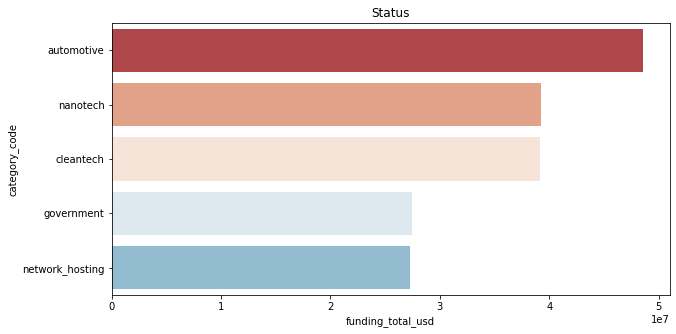

In [538]:
cat_fund = df1[['category_code', 'funding_total_usd']].groupby(by=['category_code']).mean()
top_cat_fund = cat_fund.nlargest(n=5,columns=['funding_total_usd'])
top_cat_fund  = top_cat_fund.reset_index()

plt.figure(figsize=(10,5))
sns.set_palette("RdBu")
sns.barplot(x='funding_total_usd',y='category_code',data=top_cat_fund)
    
plt.title("Status")
plt.show()

### Categories with Least Fundings

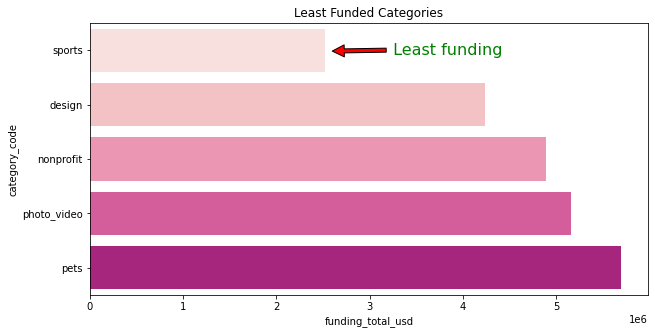

In [537]:
cat_fund = df1[['category_code', 'funding_total_usd']].groupby(by=['category_code']).mean()
bottom_cat_fund = cat_fund.nsmallest(n=5,columns=['funding_total_usd'])
bottom_cat_fund  = bottom_cat_fund.reset_index()


sns.set_palette("RdPu")
plt.figure(figsize=(10,5))
sns.barplot(x='funding_total_usd',y='category_code',data=bottom_cat_fund)
#plt.bar(x='status', height= 'funding_total_usd',data =top_status_fund )

plt.annotate(' Least funding', xy = (2.6e6, 0.015), 
             fontsize = 16, xytext = (3.2e6, 0.08), 
             arrowprops = dict(facecolor = 'red'),
             color = 'g')
    
plt.title("Least Funded Categories")
plt.show()

### Top 5 countries to contribute

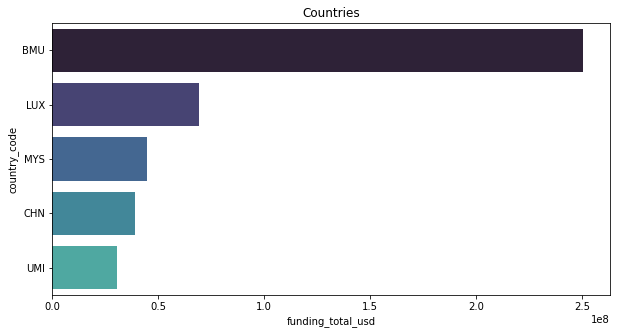

In [540]:
country_fund = df1[['country_code', 'funding_total_usd']].groupby(by=['country_code']).mean()
top_cntry_fund  = country_fund.nlargest(n=5,columns=['funding_total_usd'])
top_cntry_fund = top_cntry_fund.reset_index()

plt.figure(figsize=(10,5))
sns.set_palette("mako")
sns.barplot(x='funding_total_usd',y='country_code',data=top_cntry_fund)
    
plt.title("Countries")
plt.show()

In [510]:
# The top most funded company acquired by another company.
df1[['name','status','funding_total_usd']].nlargest(n=10,columns=['funding_total_usd'])

,name,status,funding_total_usd
4575,Clearwire,acquired,5.700000e+09
160023,"Verizon Communications, Inc.",ipo,3.985050e+09
97784,sigmacare,operating,2.600000e+09
161551,Facebook,ipo,2.425700e+09
175825,Carestream,operating,2.400000e+09
81001,Solyndra,operating,1.765504e+09
170979,Fisker Automotive,operating,1.451000e+09
151715,O3b Networks,operating,1.270283e+09
101987,Terra-Gen Power,operating,1.200000e+09
2971,Twitter,ipo,1.160167e+09


In [390]:
# Top 10 companies with highest funding rounds
df1[['name','funding_total_usd','funding_rounds']].nlargest(n=10,columns=['funding_rounds'])

,name,funding_total_usd,funding_rounds
28940,Tyro Payments,31594390.0,15.0
185938,Mobivery,140000.0,15.0
130591,Aviir,70930000.0,14.0
3446,SolarCity,789039992.0,13.0
103841,Perficient,57923499.0,13.0
123703,TeleCommunication Systems,109550000.0,13.0
149384,Galectin Therapeutics,9514000.0,13.0
168265,InstaMed,57876839.0,13.0
156863,Rostima,10640784.0,12.0
164405,Infinia,151871481.0,12.0


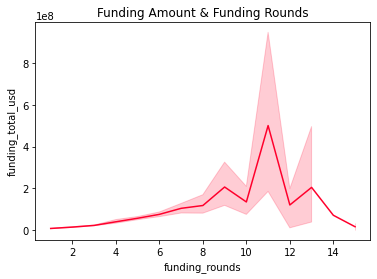

In [542]:
# Graph showing funding amount done in how many rounds
sns.set_palette("prism_r")
sns.lineplot(x='funding_rounds', y= 'funding_total_usd', data =df1)
plt.title("Funding Amount & Funding Rounds")
plt.show()

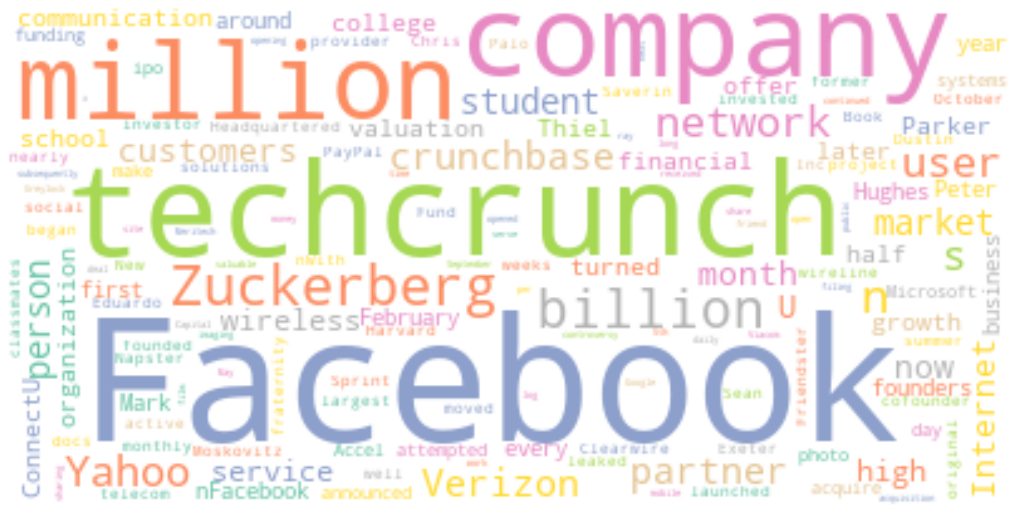

In [410]:
# Wordcloud based on the top 5 companies overview 

a = df1[['overview', 'funding_total_usd']].nlargest(n=5, columns = ['funding_total_usd'])
text1 = a.iloc[:,0]
text2 = list(map(lambda x: "".join(x),text1))

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(background_color="white",colormap='Set2',collocations=False, stopwords = STOPWORDS).generate(str(text2))
#Display the generated image
plt.figure(figsize=(18,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

## 

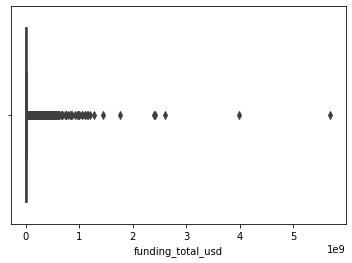

In [512]:
# Graph showing funding amount 
sns.boxplot(x=df1.funding_total_usd)
plt.show()

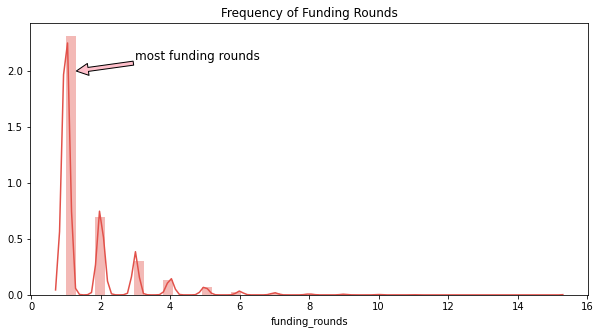

In [565]:
# Graph showing frequency of funding rounds
plt.figure(figsize=(10,5))
sns.distplot(df1.funding_rounds)
plt.annotate('most funding rounds', xy = (1.3, 2), 
             fontsize = 12, xytext = (3, 2.1), 
             arrowprops = dict(facecolor = 'pink'),
             color = 'black')
plt.title("Frequency of Funding Rounds")
plt.show()